In [1]:
library(caret)
library(dplyr)
library(cluster)
library(sampling)
library(VIM)
library(mice)
library(stats)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘sampling’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep



In [39]:
setwd("~/Documents/INFO7390 Data Science/case study 2")
data <- read.csv("./training set/clustering.csv")

In [40]:
set.seed(1)
sub<-sample(1:nrow(data),round(nrow(data)*1/3))
length(sub)
data_train<-x[sub,]

[1] 44367

# Partitioning Clustering

In [5]:
ds <- daisy(data_train)

In [10]:
wss<-NULL
for (i in 2:15){
    wss[i]<-sum(clara(as.matrix(ds),i)$clusinfo[,4])/i
}

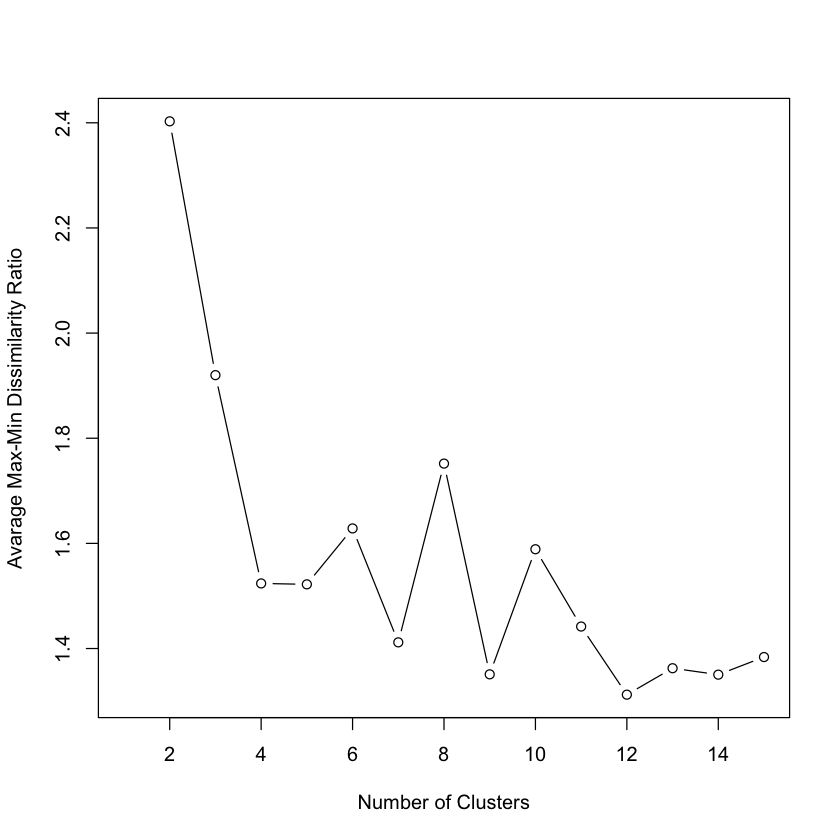

In [11]:
plot(1:15,wss,type='b',xlab='Number of Clusters',ylab='Avarage Max-Min Dissimilarity Ratio')

# Hierarchical Clustering

In [9]:
hc.ward1 = hclust(dist(data_train),method='ward.D')

Warning message in dist(data_train):
“强制改变过程中产生了NA”

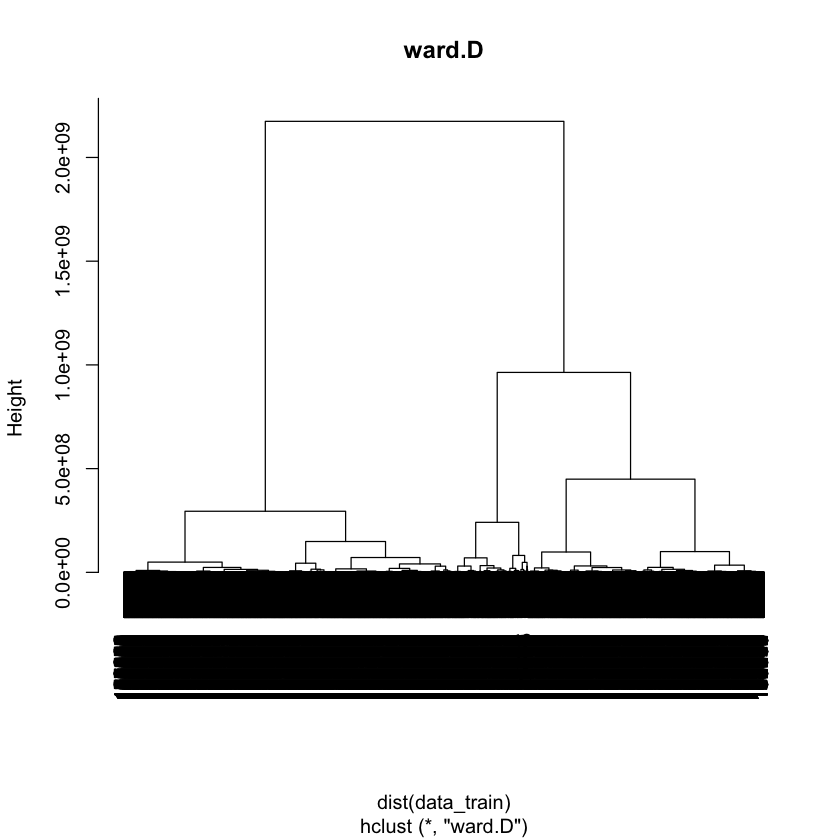

In [10]:
plot(hc.ward1,main="ward.D")

In [19]:
cutree(hc.ward1,3)

404662  567153  873084 1384195  307383 1369230 1439773 1007116  958827   94168 
      1       2       2       2       1       2       2       1       2       2 
 313924  269088 1047082  585407 1173303  758535 1093710 1511746  579205 1184888 
      2       2       3       2       2       2       3       1       1       1 
1424564  323322  993201  191356  407265  588467   20408  582787 1325470  518716 
      2       2       1       2       1       2       2       2       2       2 
 734723  913779  752190  283808 1260970 1018786 1210471  164513 1102979  626807 
      2       3       2       3       1       2       2       1       2       1 
1251170  986157 1193234  842858  807322 1203021   35558  727323 1116083 1055757 
      3       2       1       1       1       1       1       2       2       2 
 727916 1312524  667681  373083  107718  151591  482012  790420 1008923  620026 
      2       2       1       2       1       2       2       2       2       2 
1391258  447463  699633  506582  991949  393227  729319 1167882  128395 1334016 
      2       3       2       2       2       2       1       1       2       2 
 516757 1279330  528355  508682  725971 1359731 1317273  594353 1184653 1464001 
      2       2       1       2       1       2       3       1       1       3 
 662429 1085885  609598  495842 1153812  308906 1083758  185460  374127  218398 
      2       1       2       1       2       1       2       2       1       2 
 365198   89817  978852 1335439 1187070 1215102  693840  624969 1235767  921918 
      2       3       2       3       1       2       2       2       2       2 
 997798  538272  411876 1512846  965440  324928  197163  728648 1408281  912506 
      2       2       1       3       2       1       2       2       1       1 
1487673 1115243  543647  657560  225873   19931 1090510  157251  680129  975501 
      2       1       2       1       2       1       2       2       2       1 
1511541  755274  738138  264322 1150328  691725  779009  316293  348469  907847 
      1       2       2       2       1       3       1       2       1       1 
 876087  117444   54163  979598 1415177  911471  854792  801646 1501246  773626 
      2       2       3       1       1       3       2       2       2       2 
1040541  916723  364026  393434 1111435  689697  266885 1137932  159996 1317523 
      1       1       1       1       2       2       2       2       2       2 
 936687  849082  501039  690548  762645  275631  807127  114716  423284  324142 
      1       1       2       1       1       2       2       1       1       1 
 434004 1364068  680035 1188647 1342006  629574   97240  511260 1102908  514502 
      1       3       1       1       2       2       2       2       2       1 
 960706 1281036 1304682  596403  579844 1364590  981887 1129346  922435 1376224 
      2       2       1       1       2       1       3       2       1       2 
 447621  291465 1350877  767047 1336561  288315 1155283 1104072 1438152  834564 
      3       2       1       1       1       1       1       1       1       1 
1084633  592656  153722 1413121  431620  899977  168179 1280850  484545 1192987 
      1       1       1       2       1       2       3       1       2       2 
 407656  333193  787545  409853  276082  790255  857621  196821  390677 1094054 
      1       1       2       1       1       2       2       2       1       1 
1465082  152604 1163065 1444592 1247505  469802  989883 1452801 1453375  518088 
      1       1       2       2       2       2       2       2       2       2 
 399979  252132  490945  777368 1408012  778638  392582   70801  636759 1301387 
      2       2       2       1       2       2       1       1       1       2 
 529134  200301  570668  962200  594428 1050899 1050571  845592  654688  689882 
      2       1       2       1       1       2       2       1       2       1 
 466977  881329 1387274  217308  632472  321420  653353  202200  701118 1436925 
      1       2       1       2 

In [11]:
?clara.object

In [23]:
pamx <- pam(data_train, 2)
pamx # Medoids: '7' and '25' ...

Medoids:
        ID loan_amnt purpose
567153   2     10000       3
762645 155     24000       3
Clustering vector:
 404662  567153  873084 1384195  307383 1369230 1439773 1007116  958827   94168 
      1       1       1       1       1       1       1       1       1       1 
 313924  269088 1047082  585407 1173303  758535 1093710 1511746  579205 1184888 
      1       1       2       1       1       1       2       1       1       1 
1424564  323322  993201  191356  407265  588467   20408  582787 1325470  518716 
      1       1       1       1       2       1       1       1       1       1 
 734723  913779  752190  283808 1260970 1018786 1210471  164513 1102979  626807 
      1       2       1       2       2       1       1       2       1       2 
1251170  986157 1193234  842858  807322 1203021   35558  727323 1116083 1055757 
      2       1       2       1       2       2       2       1       1       1 
 727916 1312524  667681  373083  107718  151591  482012  790420 1008923  62

In [24]:
summary(pamx)

Medoids:
        ID loan_amnt purpose
567153   2     10000       3
762645 155     24000       3
Clustering vector:
 404662  567153  873084 1384195  307383 1369230 1439773 1007116  958827   94168 
      1       1       1       1       1       1       1       1       1       1 
 313924  269088 1047082  585407 1173303  758535 1093710 1511746  579205 1184888 
      1       1       2       1       1       1       2       1       1       1 
1424564  323322  993201  191356  407265  588467   20408  582787 1325470  518716 
      1       1       1       1       2       1       1       1       1       1 
 734723  913779  752190  283808 1260970 1018786 1210471  164513 1102979  626807 
      1       2       1       2       2       1       1       2       1       2 
1251170  986157 1193234  842858  807322 1203021   35558  727323 1116083 1055757 
      2       1       2       1       2       2       2       1       1       1 
 727916 1312524  667681  373083  107718  151591  482012  790420 1008923  62

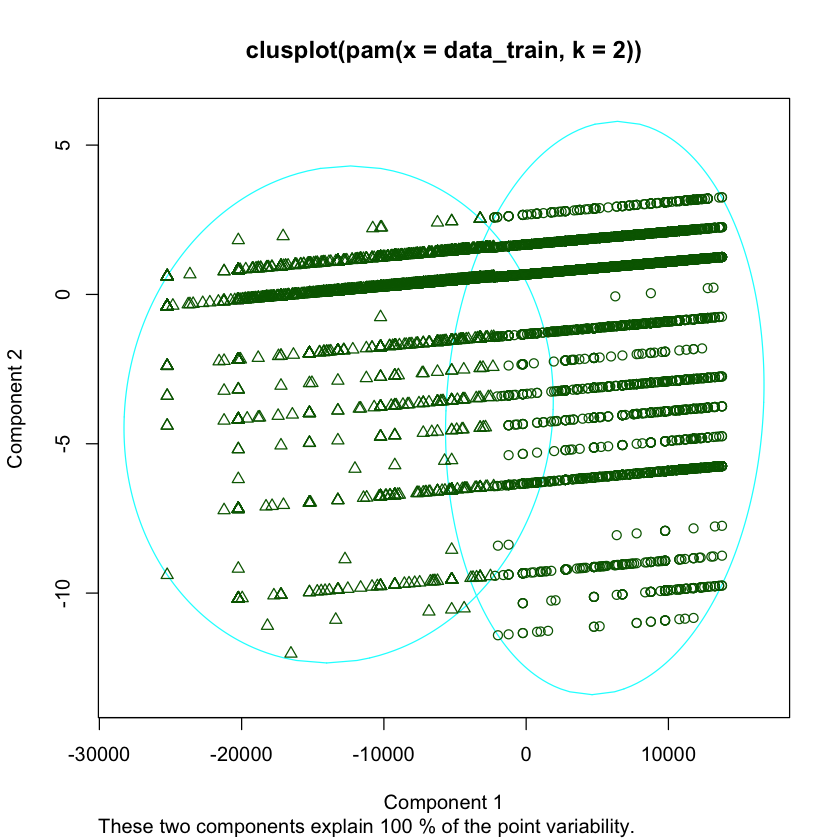

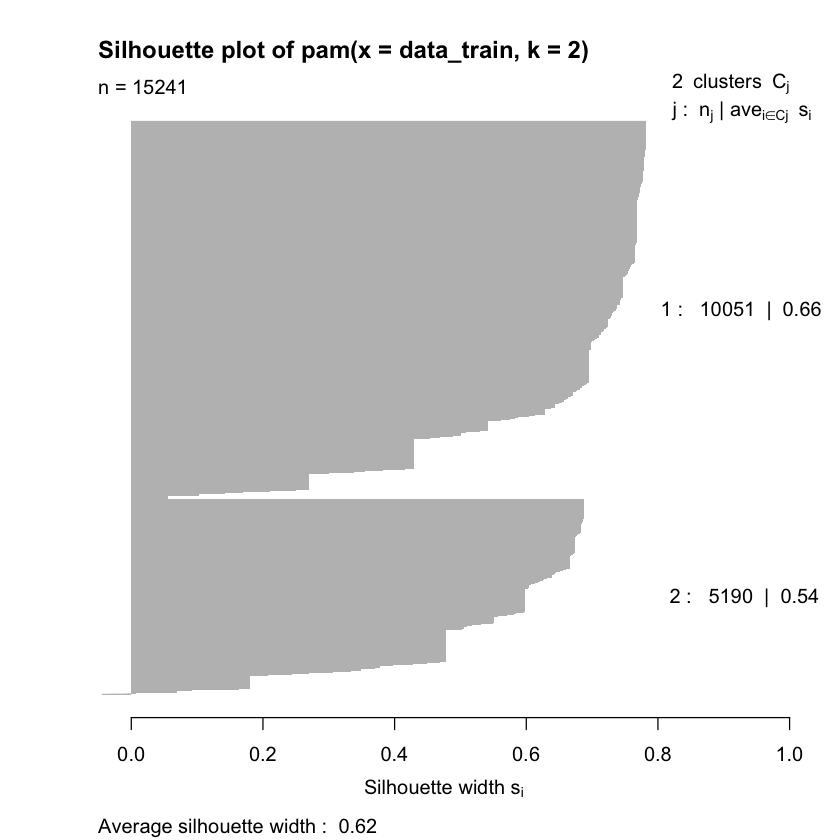

In [25]:
plot(pamx)

In [21]:
x[,1]<-clus

ERROR: Error in `[<-.data.frame`(`*tmp*`, , 1, value = structure(c(1L, 2L, 1L, : replacement has 13310 rows, data has 133101
